In [27]:
import numpy as np
import h5py
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import os
import math
from extraction_backup import extract_features
from scipy import spatial

In [28]:
queryImg = io.imread("images/tamatar.jpg") 
if queryImg.shape[-1] == 4:
        queryImg = queryImg[:, :, :3]

In [29]:
h5f = h5py.File("CustomFeatures.h5",'r')
feats = h5f['dataset_1'][:]
imgNames = h5f['dataset_2'][:]
h5f.close()

print(" searching for similar images")

X = extract_features(queryImg) #extract features of query image

scores = []
for i in range(feats.shape[0]):
    score = 1 - spatial.distance.cosine(X, feats[i])
    if score != 1:
        scores.append((score, imgNames[i]))
#         print(f"{(score, imgNames[i])}")

sorted_scores = sorted(scores, key=lambda x: x[0], reverse=True)

max_matches = 50
imlist = [imgName for score, imgName in sorted_scores[:max_matches]]
# print(f"Top {max_images_match} images in order are:", imlist)


 searching for similar images


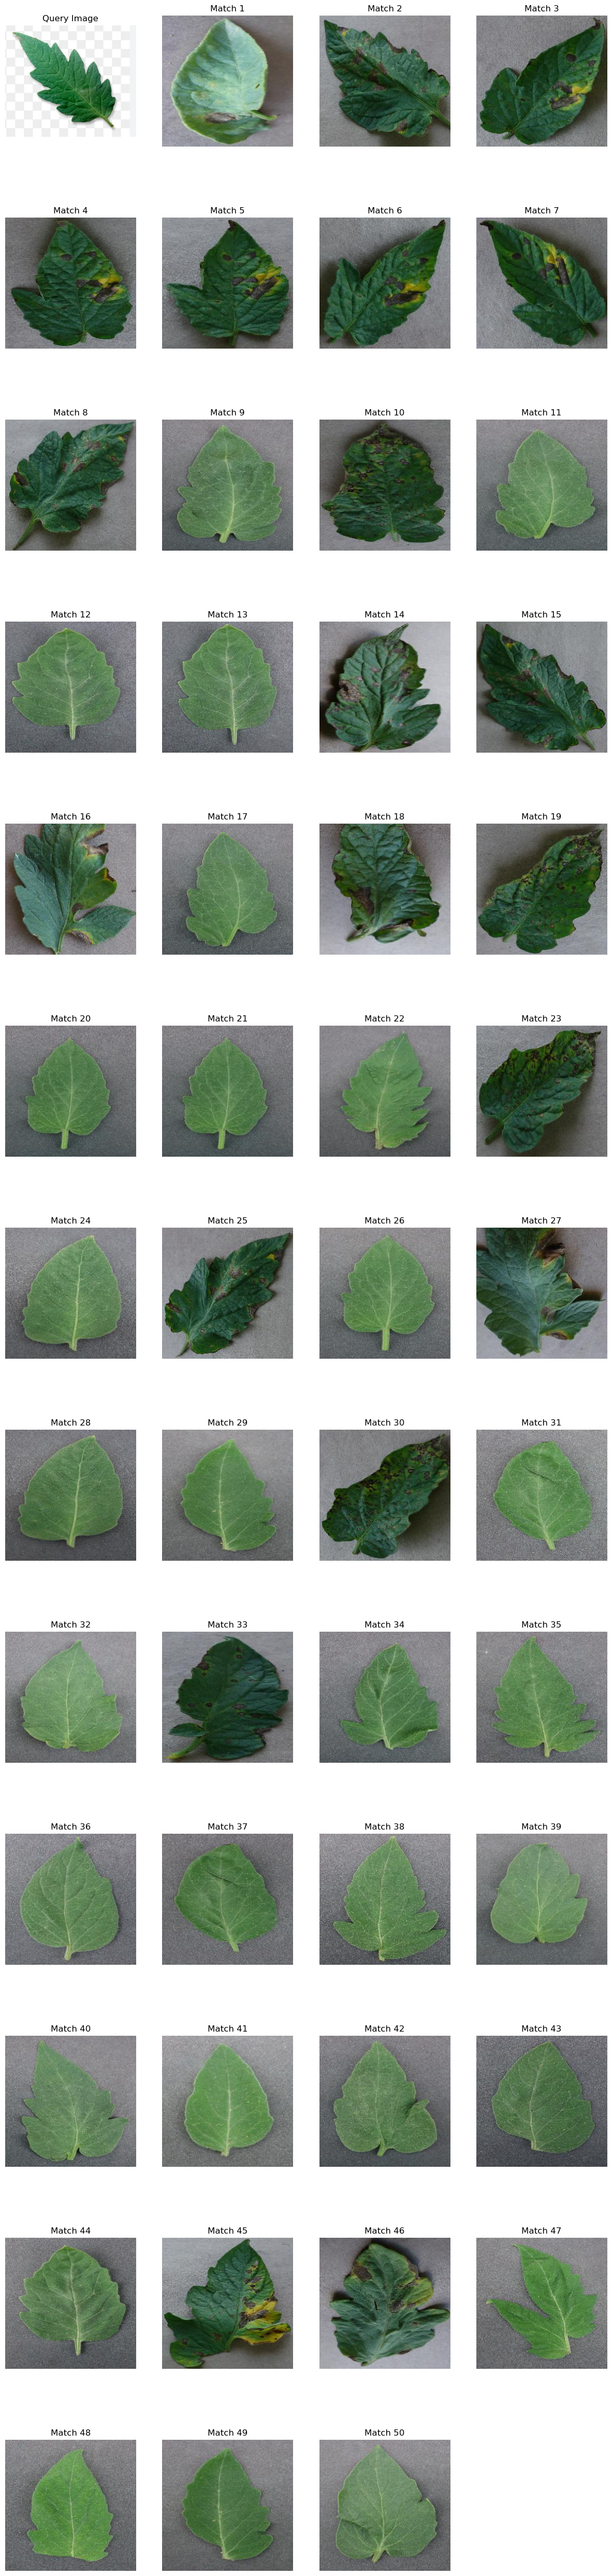

In [30]:
def display_images(query_img_path, top_matches, base_path, num_columns=4):
    num_images = len(top_matches) + 1 
    num_rows = math.ceil(num_images / num_columns) 

    plt.figure(figsize=(15, num_rows * 5)) 

    query_img = io.imread(query_img_path)
    plt.subplot(num_rows, num_columns, 1)  
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')
    
    for i, img_name in enumerate(top_matches):
        img_path = os.path.join(base_path, img_name.decode('utf-8'))
#         print(img_path)
        img = io.imread(img_path)
        plt.subplot(num_rows, num_columns, i + 2)  
        plt.imshow(img)
        plt.title(f"Match {i + 1}")
        plt.axis('off')

    plt.show()

display_images("images/tamatar.jpg", imlist, "")

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def get_label_from_path(image_path):
    return os.path.basename(os.path.dirname(image_path))

features = []
labels = []

for img_path in imlist:
    img = io.imread(os.path.join("", img_path.decode('utf-8')))
    feature = extract_features(img)
    features.append(feature)
    label = get_label_from_path(img_path.decode('utf-8'))
    labels.append(label)

features = np.array(features)
labels = np.array(labels)


In [17]:
import pandas as pd

features = []
labels = []

for img_path in imlist:
    img = io.imread(os.path.join("", img_path.decode('utf-8')))
    feature = extract_features(img)
    features.append(feature)
    label = get_label_from_path(img_path.decode('utf-8'))
    labels.append(label)

features_df = pd.DataFrame(features)
features_df['label'] = labels


In [18]:
features_df

0          1         2         3         4         5  \
0   -9.276814   5.564526  3.646992  0.636894  0.025633  0.027751   
1   -9.785775   5.905958  3.883015  0.484038  0.034100  0.033541   
2  -10.555855   7.990868  4.084506  0.370596  0.046976  0.038190   
3  -10.439017   7.666413  4.076565  0.320291  0.043189  0.037345   
4  -10.005456   7.110456  4.057793  0.369027  0.043786  0.037245   
5  -10.107745   7.489663  4.068599  0.353226  0.042002  0.035838   
6   -9.786668   7.419296  4.007638  0.386241  0.040575  0.034835   
7   -9.730377   5.846705  4.036609  0.393271  0.042476  0.037180   
8  -10.222939   8.073729  4.083890  0.261957  0.044179  0.034162   
9   -9.574041   7.748129  3.949869  0.403476  0.036577  0.034689   
10  -9.666940   7.490861  4.075012  0.255515  0.044147  0.033729   
11  -9.433005   6.759166  4.140913  0.299269  0.051917  0.038620   
12  -9.548930   6.774092  4.186652  0.281974  0.056053  0.040373   
13  -8.023034   5.201293  3.792809  0.755813  0.037153  0.038518   
14  -9.159234   5.321849  3.940140  0.396936  0.036340  0.033429   
15  -9.344622   5.845292  4.161062  0.320649  0.051416  0.042062   
16  -9.236511   6.690033  4.158478  0.256572  0.051510  0.036789   
17  -7.869560   5.270064  3.822798  0.645428  0.036564  0.035967   
18  -9.723027   8.579738  3.961276  0.409899  0.039642  0.035916   
19  -8.863280   6.519855  4.092354  0.285301  0.046892  0.034645   
20  -8.863280   6.519855  4.092354  0.285301  0.046892  0.034645   
21  -9.120895   8.023602  3.757722  0.345127  0.027241  0.024375   
22  -8.860584   7.510817  3.965022  0.422932  0.037707  0.034531   
23  -9.627497   8.177650  4.195936  0.297249  0.058656  0.041232   
24  -8.551307   5.273626  4.026156  0.404692  0.043804  0.037041   
25  -9.624582   8.261220  4.158084  0.254893  0.051536  0.037057   
26  -8.302630   4.693859  3.859516  0.517740  0.034072  0.033544   
27  -9.597781   8.465381  4.090616  0.325816  0.048907  0.035925   
28  -9.758452   9.027227  3.868095  0.373352  0.034272  0.027777   
29  -8.461449   7.025529  3.985628  0.408193  0.038665  0.035332   
30 -10.468698   9.351521  4.313178  0.231391  0.070517  0.046360   
31  -9.326719   8.191509  4.044488  0.295803  0.043188  0.032844   
32  -8.669068   4.362025  3.764194  0.478379  0.029115  0.028019   
33  -8.711806   6.438150  4.194847  0.249532  0.054952  0.038881   
34 -10.170854   9.159610  4.215956  0.238530  0.056948  0.039142   
35  -9.043552   7.412676  4.237857  0.264399  0.060185  0.042863   
36  -9.628413   8.436378  4.231852  0.256343  0.059125  0.040325   
37 -10.092344   8.871166  4.360043  0.208711  0.079252  0.051094   
38  -8.547803   7.070209  4.028865  0.283975  0.041541  0.031578   
39  -8.689789   7.030654  4.167495  0.251554  0.052399  0.036900   
40 -10.333055   9.834126  4.043840  0.354912  0.045001  0.034224   
41  -8.772458   7.311688  4.189294  0.253350  0.054483  0.038794   
42  -8.606748   6.385104  4.282364  0.245757  0.068535  0.045587   
43  -8.966890   7.714852  4.213956  0.257434  0.056986  0.041247   
44  -9.195368   8.700296  3.971918  0.497291  0.044564  0.039102   
45  -7.740778   4.713507  3.942655  0.582815  0.041652  0.038632   
46 -10.762782  10.240446  4.246265  0.264455  0.062821  0.041708   
47 -11.560021  11.195081  4.223919  0.260782  0.059491  0.040758   
48  -8.801996   8.047203  3.933887  0.315746  0.035610  0.028944   
49  -8.724695   7.705791  4.052309  0.279269  0.043227  0.033420   

                  label  
0   Tomato_Early_blight  
1   Tomato_Early_blight  
2   Tomato_Early_blight  
3   Tomato_Early_blight  
4   Tomato_Early_blight  
5   Tomato_Early_blight  
6   Tomato_Early_blight  
7   Tomato_Early_blight  
8        Tomato_healthy  
9   Tomato_Early_blight  
10       Tomato_healthy  
11       Tomato_healthy  
12       Tomato_healthy  
13  Tomato_Early_blight  
14  Tomato_Early_blight  
15  Tomato_Early_blight  
16       Tomato_healthy  
17  Tomato_Early_blight  
18  Tomato_Early_blight  
19       Tomato_healthy

In [25]:
freq = features_df['label'].value_counts()

In [26]:
freq

Tomato_healthy         29
Tomato_Early_blight    21
Name: label, dtype: int64